# introduction to neural network classification with tf

# creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# featurees
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

vizaualize data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


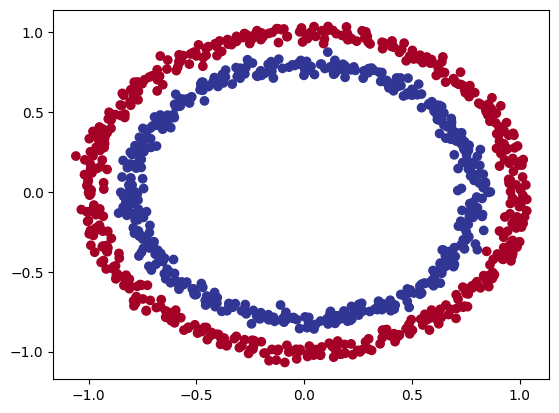

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# input and output shapes

In [6]:
# check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# check how many samples
len(X), len(y)

(1000, 1000)

# steps in modelling

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 2ms/step - loss: 4.3442 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 2.1991 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4920


In [9]:
# train for longer

model_1.fit(X, y, epochs=200)
model_1.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4930
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4910
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4530
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4970
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4750
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5120
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4930
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4740
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4860
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4780
Epoch 11/

[0.6934829950332642, 0.5]

In [10]:
import tensorflow as tf
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model_2.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 1.2010 - accuracy: 0.4650
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4890
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4770
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4750
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4780
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4990
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4890
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4780
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5110
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4880
Epoch 11/

model still guessing, 50% accuracy

# improving model

In [11]:
# add extra layer

tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5955 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4600
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5230
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4730
Epoch 11/

In [12]:
model_3.evaluate(X,y)
import numpy as np

32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5090


In [13]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    # ravel flattens a multidimensional array into a one-dimensional array
    # c_ concatenates the columns of two vertically stacked arrays
    # example of above code: xx = [[1, 2, 3], [4, 5, 6]] yy = [[6, 7, 8], [9, 10, 11]]
    # xx.ravel() -> [1,2,3,4,5,6] yy.ravel() ->[6,7,8,9,10,11]
    # np.c_ -> [1,6], [2,7], [3,8], [4,9]...

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 828us/step
doing binary classifcation...


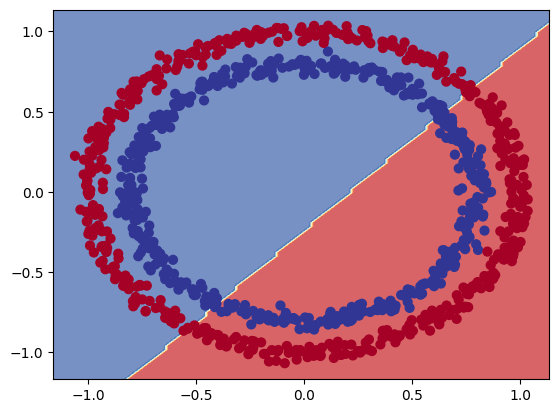

In [14]:
plot_decision_boundary(model=model_3, X=X, y=y)

In [15]:
# # as model makes a line in the above graph, check if it can be used for a regression problem
# tf.random.set_seed(42)

# X_regression = tf.range(0,1000,5)
# y_regression = tf.range(100,1100,5)

# X_reg_train = X_regression[:150]
# y_reg_train = y_regression[:150]
# X_reg_test = X_regression[150:]
# y_reg_test = y_regression[:150]

# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# issue: non-linearity

In [16]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


C:\Users\parth\miniconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 5.3592 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2521 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1705 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0995 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0089 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9709 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8486 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6389 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6066 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5786 - accuracy: 0.4720
Epoch 11/100
32/32 [=

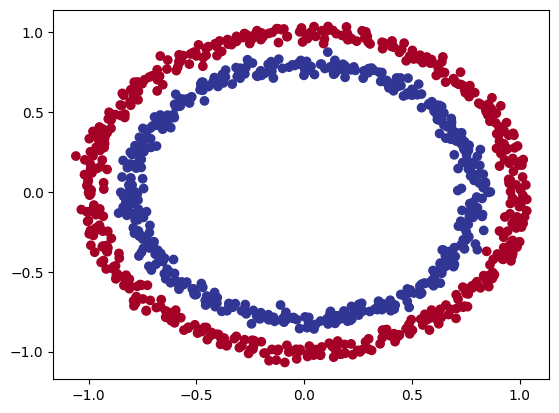

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 800us/step
doing binary classifcation...


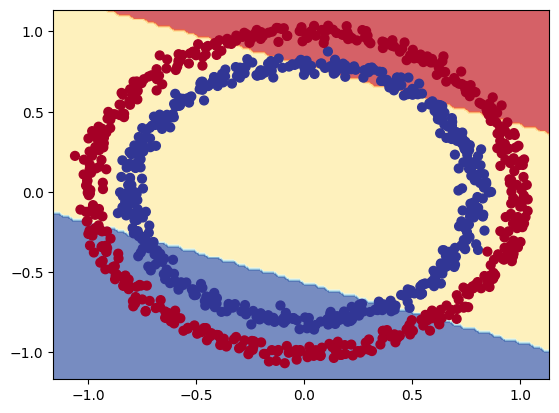

In [18]:
plot_decision_boundary(model=model_4, X=X, y=y)

In [19]:
# use a non-linear activation function
# use relu
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9898 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9826 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9818 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9811 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9804 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9707 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9677 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9587 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9210 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9204 - accuracy: 0.4850
Epoch 11/

313/313 [==============================] - 0s 719us/step
doing binary classifcation...


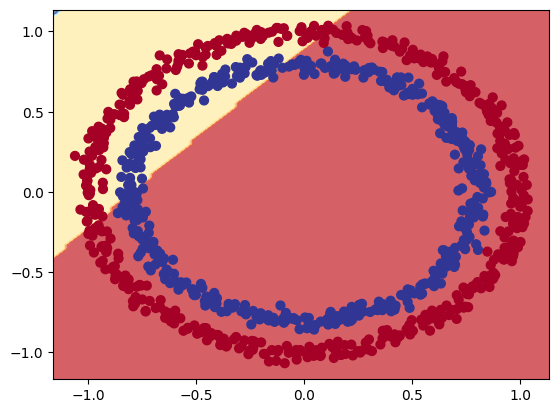

In [20]:
plot_decision_boundary(model=model_5, X=X, y=y)

In [21]:
# add more layers from tensorflow playfground to here
# use a non-linear activation function
# use relu
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 932us/step
doing binary classifcation...


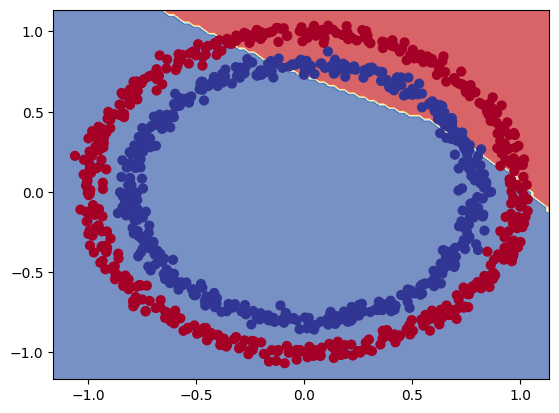

In [22]:
plot_decision_boundary(model=model_6, X=X, y=y)

In [23]:
# add more layers from tensorflow playfground to here
# use a non-linear activation function
# use relu
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5040
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5090
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5110
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5140
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5190
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5190
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5190
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5190
Epoch 11/

313/313 [==============================] - 0s 789us/step
doing binary classifcation...


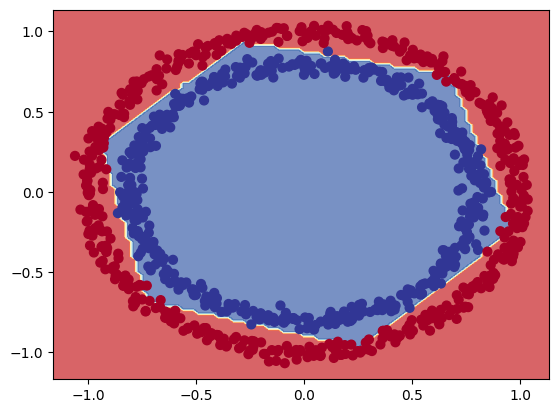

In [24]:
plot_decision_boundary(model=model_7, X=X, y=y)

In [25]:
# create a dummy tensor (similar to the data passed into models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

# activation functions

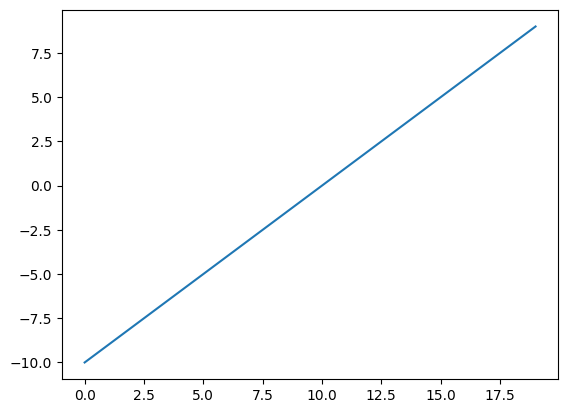

In [26]:
plt.plot(A)

In [27]:
# replicate sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

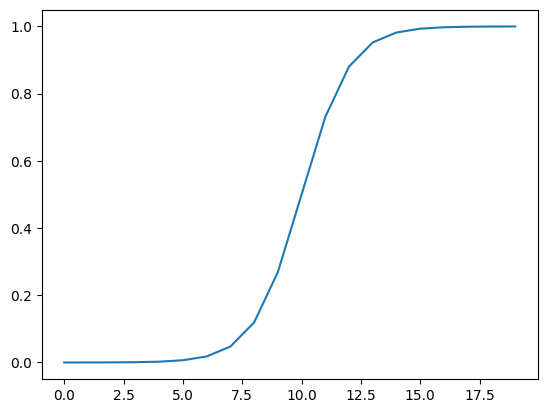

In [28]:
plt.plot(sigmoid(A))

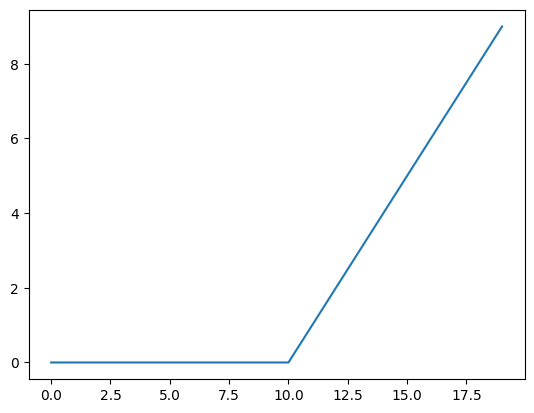

In [29]:
def relu(x):
    return tf.maximum(0, x)
plt.plot(relu(A))

# evaluating and improving classifciation

In [30]:
# spilt into train and test sets
X_train, y_train = X[:800], y[:800]
x_test, y_test = X[800:], y[800:]

In [48]:

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4950
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5113
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5288
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5362
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5537
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5487
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5675
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5962
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6237
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6550
Epoch 11/25
25/25 [

In [46]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9850
Model loss on the test set: 0.09954557567834854
Model accuracy on the test set: 98.50%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


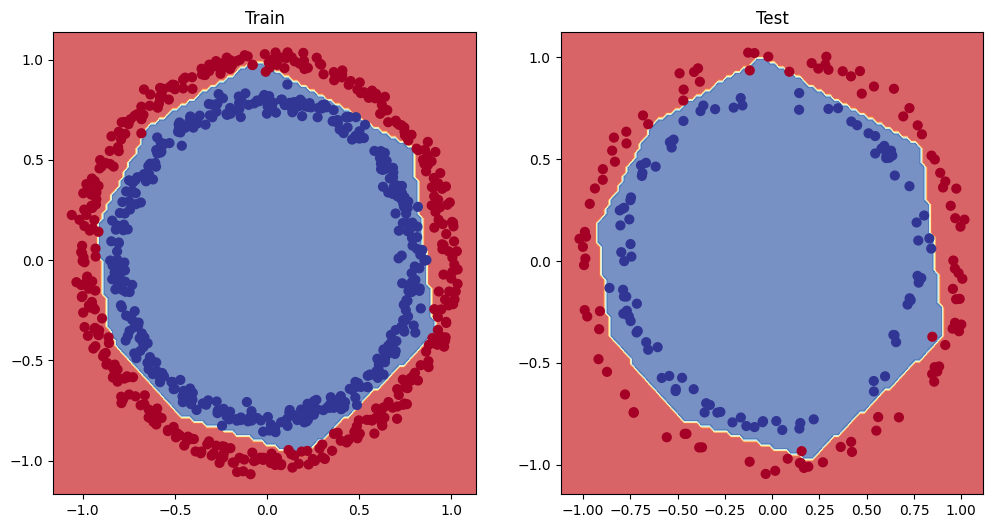

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=x_test, y=y_test)
plt.show()

## plot the loss (or training) curves

In [49]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.694980,0.49500
1,0.689928,0.51125
2,0.687586,0.52875
3,0.685828,0.53625
4,0.682361,0.55375
5,0.678456,0.54875
6,0.671654,0.56750
7,0.662019,0.59625
8,0.644858,0.62375
9,0.624103,0.65500


<Axes: >

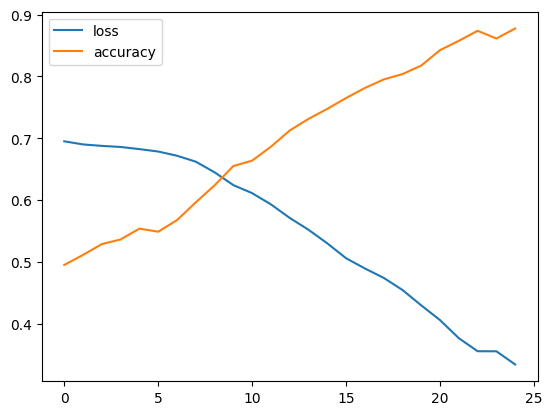

In [50]:
pd.DataFrame(history.history).plot()

# finding the best learning rate

In [51]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])
     

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

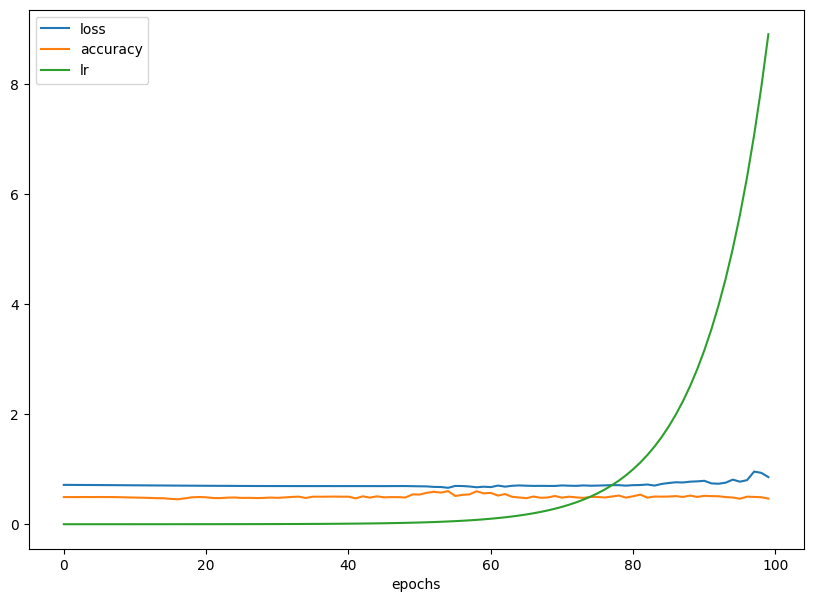

In [52]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

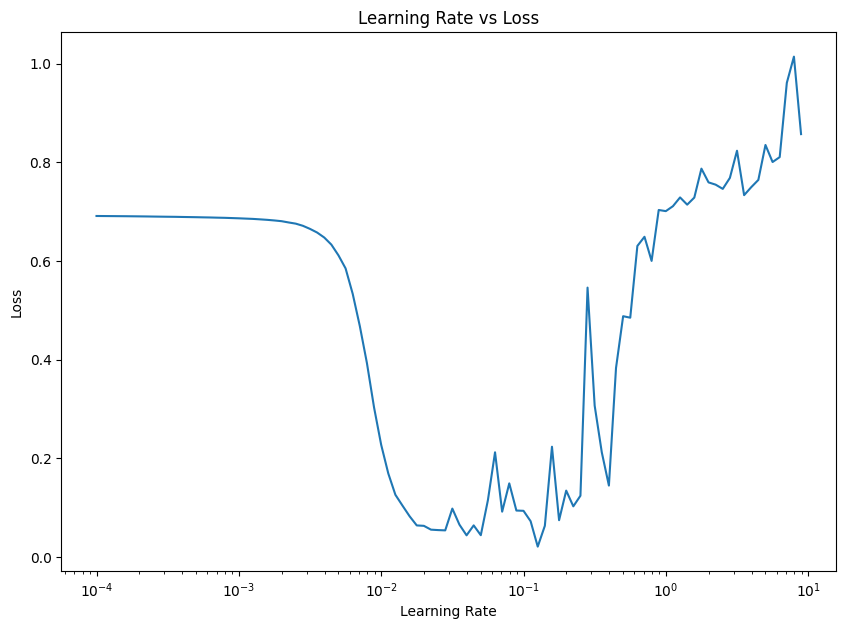

In [61]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.4775
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5200
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5412
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.5800
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6837
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7412
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8275
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8875
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.9362
Epoch 11/20
25/25 [

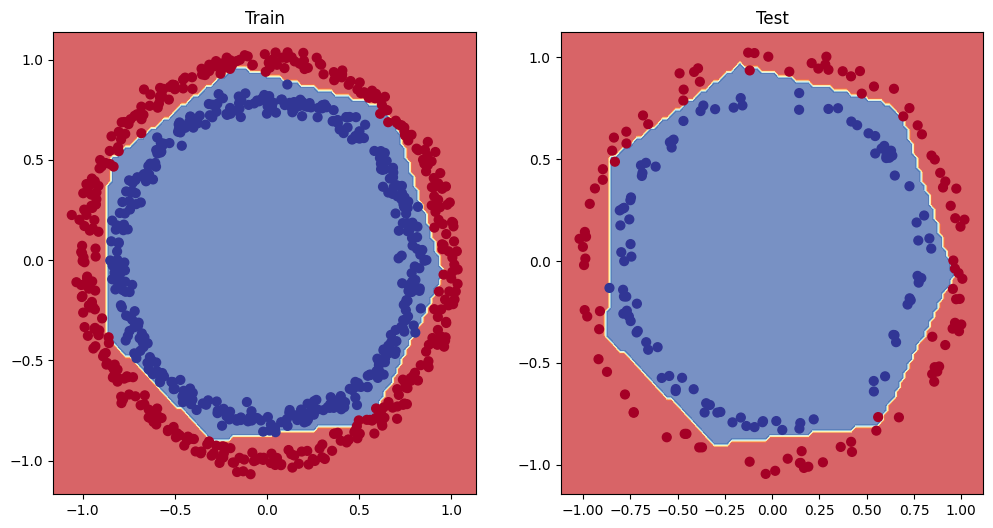

In [66]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)
     

# Evaluate model on the test dataset
model_10.evaluate(x_test, y_test)


# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=x_test, y=y_test)
plt.show()

# mroe evaluation metrics
* accuracy
* precision
* recall
* f1-score
* confusion matrix
* classirification report

In [68]:
# check acculracy
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.0691 - accuracy: 0.9850
Model loss on test set: 0.06912544369697571
Model accuracy on test set: 98.50%


In [70]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 1ms/step


array([[98,  3],
       [ 0, 99]], dtype=int64)

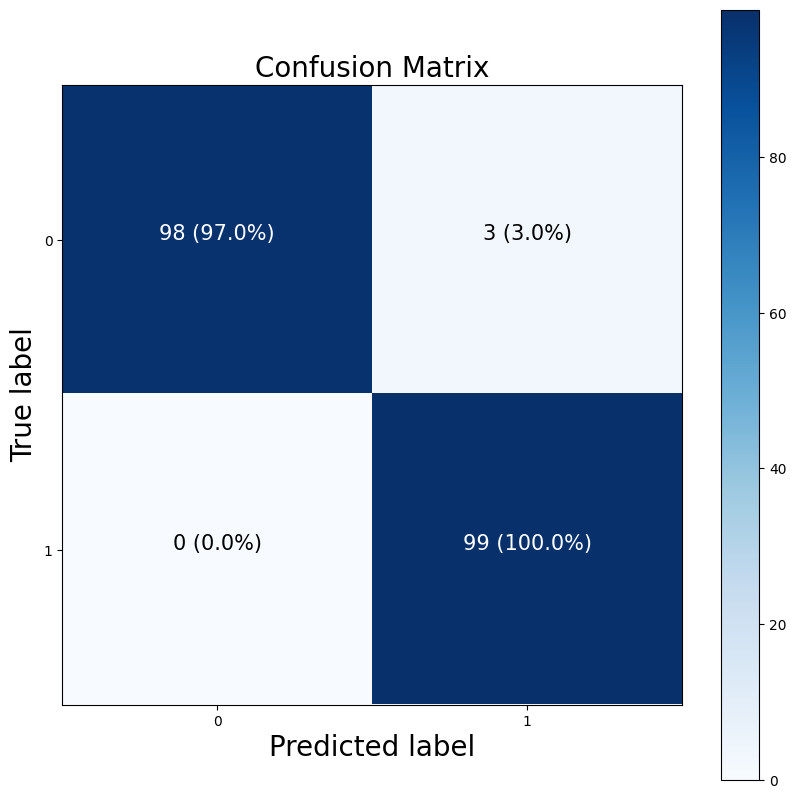

In [75]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# multiclass classification

In [76]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
print(train_data[0])

4422102/4422102 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 

In [77]:
train_labels[0]

9

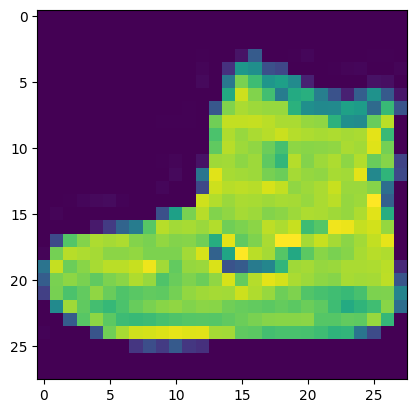

In [80]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [81]:
# create a small list so we can index onto training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
len(class_names)

10

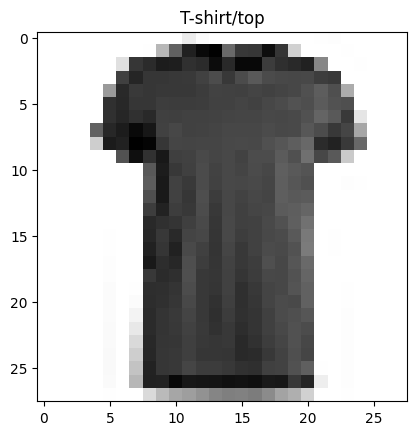

In [82]:

# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

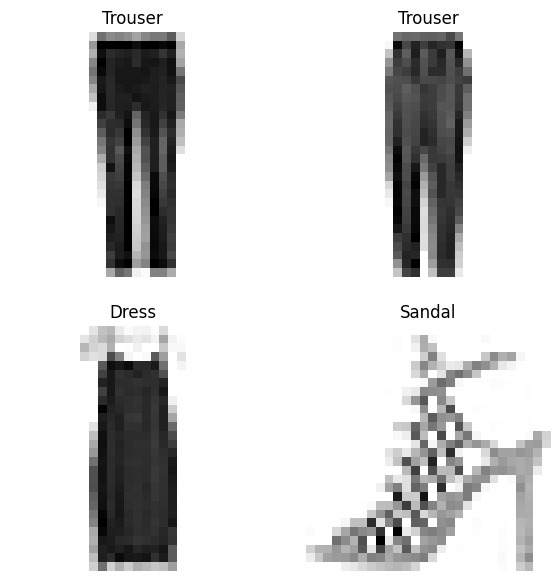

In [85]:

# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)
     

# build a classification model
* input shape: 28x28
* output shape: 10
* loss: categorical crossemntropy
* activation: softmax

In [96]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7819 - accuracy: 0.2961 - val_loss: 1.4654 - val_accuracy: 0.4009
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2622 - accuracy: 0.4643 - val_loss: 1.0983 - val_accuracy: 0.5851
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9838 - accuracy: 0.6298 - val_loss: 0.9357 - val_accuracy: 0.6625
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8714 - accuracy: 0.6695 - val_loss: 0.8712 - val_accuracy: 0.6708
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8264 - accuracy: 0.6773 - val_loss: 0.8356 - val_accuracy: 0.6778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8024 - accuracy: 0.6859 - val_loss: 0.8244 - val_accuracy: 0.6818
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7878 - accuracy: 0.6885 - val_loss: 0.8061 - val_accuracy:

In [90]:
model_11.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 4)                 3140      
                                                                 
 dense_51 (Dense)            (None, 4)                 20        
                                                                 
 dense_52 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [92]:


# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [93]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [94]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2055 - accuracy: 0.5637 - val_loss: 0.8934 - val_accuracy: 0.6789
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8192 - accuracy: 0.6998 - val_loss: 0.7827 - val_accuracy: 0.7153
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7301 - accuracy: 0.7390 - val_loss: 0.7239 - val_accuracy: 0.7446
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6818 - accuracy: 0.7556 - val_loss: 0.6960 - val_accuracy: 0.7588
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6560 - accuracy: 0.7671 - val_loss: 0.6708 - val_accuracy: 0.7656
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6362 - accuracy: 0.7743 - val_loss: 0.6625 - val_accuracy: 0.7687
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6208 - accuracy: 0.7810 - val_loss: 0.6533 - val_accuracy:

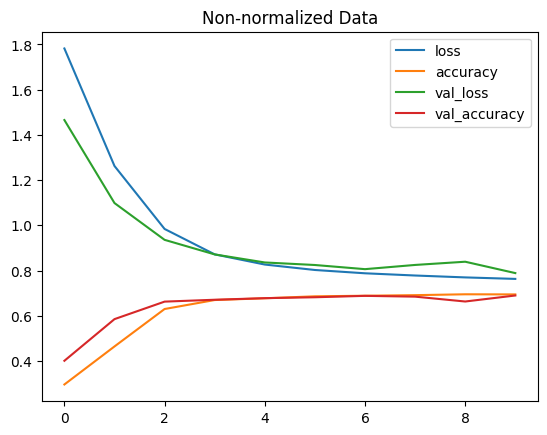

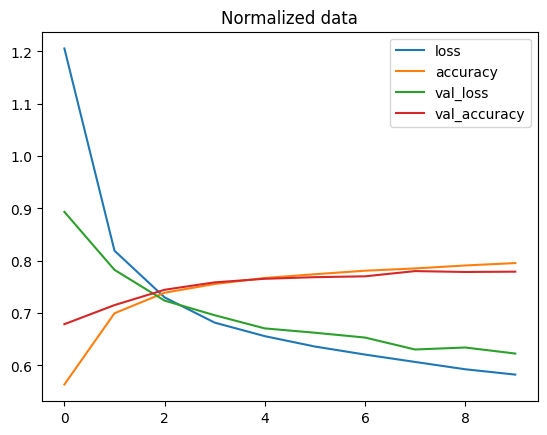

In [97]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

# finding ideal learning rqatte

In [101]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=4, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9344 - accuracy: 0.2360 - val_loss: 1.6834 - val_accuracy: 0.2885 - lr: 0.0010
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4512 - accuracy: 0.3914 - val_loss: 1.2040 - val_accuracy: 0.4901 - lr: 0.0011
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0579 - accuracy: 0.5988 - val_loss: 0.9853 - val_accuracy: 0.6267 - lr: 0.0013
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9266 - accuracy: 0.6371 - val_loss: 0.9078 - val_accuracy: 0.6425 - lr: 0.0014


In [102]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4191 - accuracy: 0.4924 - val_loss: 0.7600 - val_accuracy: 0.7642
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6534 - accuracy: 0.7818 - val_loss: 0.6286 - val_accuracy: 0.7874
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5874 - accuracy: 0.7971 - val_loss: 0.6069 - val_accuracy: 0.7914
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5649 - accuracy: 0.8041 - val_loss: 0.5986 - val_accuracy: 0.7949
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5521 - accuracy: 0.8074 - val_loss: 0.5905 - val_accuracy: 0.7955
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5431 - accuracy: 0.8111 - val_loss: 0.5765 - val_accuracy: 0.7989
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5365 - accuracy: 0.8130 - val_loss: 0.6021 - val_accuracy:

# evaluating the model

In [111]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
     

In [112]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Boot']

In [113]:
# make some predictions with model
y_probs = model_14.predict(test_data) # probs short for prediction possibilities

y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[5.32743127e-10, 5.68940237e-08, 7.10791148e-11, 2.36926198e-07,
        6.69822908e-09, 1.40264764e-01, 1.06981108e-11, 2.68221051e-01,
        1.03914332e-04, 5.91409981e-01],
       [3.40620272e-06, 2.60631378e-10, 8.38160872e-01, 7.21174956e-06,
        1.13837011e-01, 1.39068707e-05, 4.79433984e-02, 8.34598096e-21,
        3.42859748e-05, 4.80338884e-26],
       [4.86886620e-06, 9.95010853e-01, 3.33904637e-09, 1.71226449e-03,
        5.16669596e-09, 5.80399297e-04, 3.01653849e-08, 1.33221954e-06,
        9.58657065e-09, 2.69013131e-03],
       [4.99875208e-09, 9.97322857e-01, 1.10267058e-12, 1.31581095e-04,
        4.88885711e-12, 1.05149782e-04, 1.10787829e-11, 1.95330365e-08,
        4.65704081e-12, 2.44033453e-03],
       [8.38257372e-02, 2.50256591e-04, 1.61651686e-01, 2.36182772e-02,
        1.03499584e-01, 1.73116906e-03, 6.17503762e-01, 2.47004635e-07,
        7.91933760e-03, 1.05196230e-09]], dtype=float32)

In [114]:
# convert probs into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

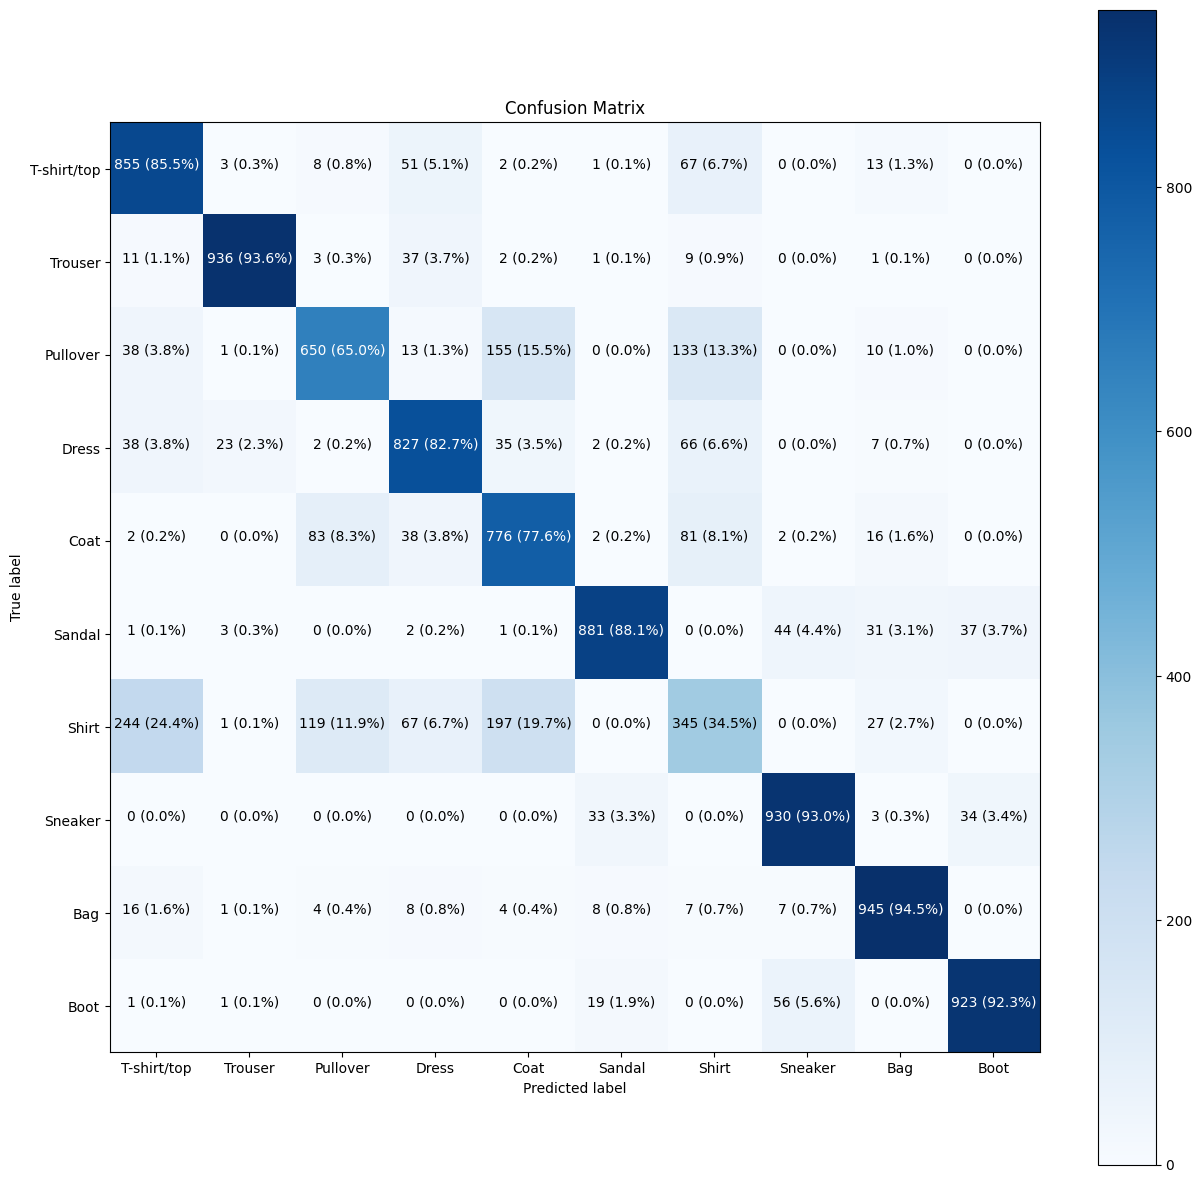

In [115]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [121]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap = plt.cm.binary)

    if pred_label == true_label:
        color = "g"
    else:
        color = "r"

    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100 * tf.reduce_max(pred_probs), true_label), color=color)

1/1 [==============================] - 0s 15ms/step


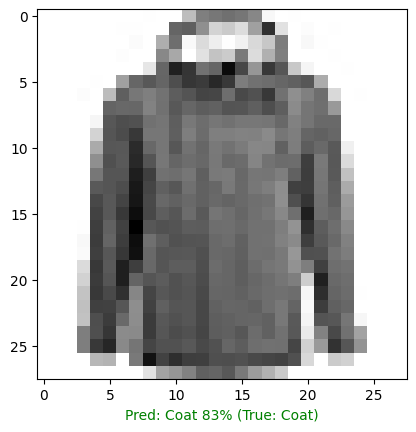

In [134]:
plot_random_image(model_14, test_data, test_labels, class_names)

In [135]:
model_14.layers

In [136]:
model_14.layers[1]

In [140]:
# get patterns of a layer in network
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.54310936,  0.48825553,  0.47760344, -0.26376322],
        [-0.04370255,  0.55479234,  1.0284114 , -0.94768465],
        [-0.8174994 ,  1.0813911 ,  1.047955  , -0.7500381 ],
        ...,
        [ 0.07742777,  0.10206157,  0.9800067 ,  0.47844827],
        [ 0.3093642 ,  0.3214383 ,  1.3945423 , -0.03116739],
        [-0.61987007,  0.11708287,  0.78420013,  0.02470684]],
       dtype=float32),
 (784, 4))